In [1]:
import pandas as pd
import numpy as np

%store -r IF22021
IF22021

,Day,BZN|FR > BZN|GB [MW],BZN|GB > BZN|FR [MW]
0,01.01.2021 00:00 - 01.01.2021 01:00,NaN,NaN
1,02.01.2021 00:00 - 02.01.2021 01:00,NaN,NaN
2,03.01.2021 00:00 - 03.01.2021 01:00,NaN,NaN
3,04.01.2021 00:00 - 04.01.2021 01:00,NaN,NaN
4,05.01.2021 00:00 - 05.01.2021 01:00,NaN,NaN
...,...,...,...
360,27.12.2021 00:00 - 27.12.2021 01:00,19200.0,246.0
361,28.12.2021 00:00 - 28.12.2021 01:00,24619.0,0.0
362,29.12.2021 00:00 - 29.12.2021 01:00,16121.0,1064.0
363,30.12.2021 00:00 - 30.12.2021 01:00,0.0,3842.0


In [2]:
%store -r IF22022
IF22022

,Day,BZN|FR > BZN|GB [MW],BZN|GB > BZN|FR [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,0.0,0.0
1,02.01.2022 00:00 - 02.01.2022 01:00,0.0,0.0
2,03.01.2022 00:00 - 03.01.2022 01:00,6276.0,0.0
3,04.01.2022 00:00 - 04.01.2022 01:00,16964.0,0.0
4,05.01.2022 00:00 - 05.01.2022 01:00,15511.0,349.0
...,...,...,...
360,27.12.2022 00:00 - 27.12.2022 01:00,18618.0,0.0
361,28.12.2022 00:00 - 28.12.2022 01:00,17817.0,950.0
362,29.12.2022 00:00 - 29.12.2022 01:00,14385.0,1137.0
363,30.12.2022 00:00 - 30.12.2022 01:00,14655.0,4229.0


In [3]:
IF2Flows = pd.concat([IF22021["BZN|FR > BZN|GB [MW]"], IF22022["BZN|FR > BZN|GB [MW]"]], ignore_index=True).to_frame("BZN|FR > BZN|GB [MW]")
IF2Flows["BZN|GB > BZN|FR [MW]"] = pd.concat([IF22021["BZN|GB > BZN|FR [MW]"], IF22022["BZN|GB > BZN|FR [MW]"]], ignore_index=True).to_frame("BZN|GB > BZN|FR [MW]")

IF2Flows["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|FR > BZN|GB [MW]", "BZN|GB > BZN|FR [MW]"]

IF2Flows = IF2Flows.reindex(columns=NewOrder)

print(IF2Flows.to_string())

          Date  BZN|FR > BZN|GB [MW]  BZN|GB > BZN|FR [MW]
0   2021-01-01                   NaN                   NaN
1   2021-01-02                   NaN                   NaN
2   2021-01-03                   NaN                   NaN
3   2021-01-04                   NaN                   NaN
4   2021-01-05                   NaN                   NaN
5   2021-01-06                   NaN                   NaN
6   2021-01-07                   NaN                   NaN
7   2021-01-08                   NaN                   NaN
8   2021-01-09                   NaN                   NaN
9   2021-01-10                   NaN                   NaN
10  2021-01-11                   NaN                   NaN
11  2021-01-12                   NaN                   NaN
12  2021-01-13                   NaN                   NaN
13  2021-01-14                   NaN                   NaN
14  2021-01-15                   NaN                   NaN
15  2021-01-16                   NaN                   N

(18643.0, 19391.0)


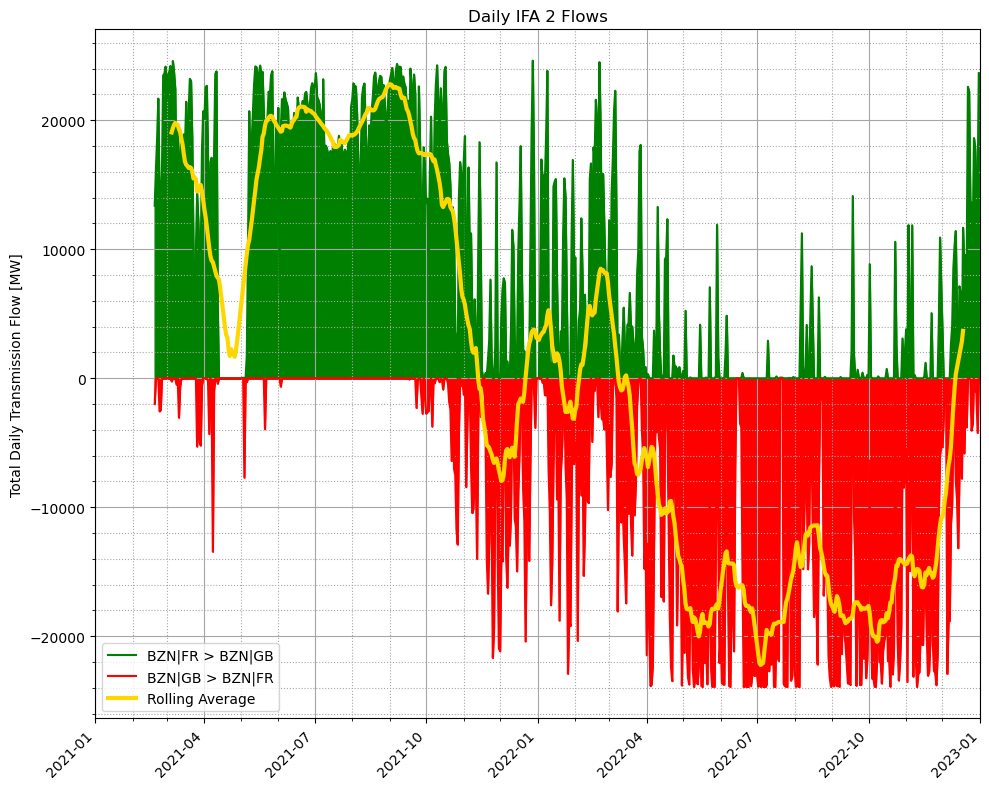

In [4]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Daily IFA 2 Flows')
plt.ylabel('Total Daily Transmission Flow [MW]')

Mean = (IF2Flows["BZN|FR > BZN|GB [MW]"] - IF2Flows["BZN|GB > BZN|FR [MW]"])/2
Sum = IF2Flows["BZN|FR > BZN|GB [MW]"] - IF2Flows["BZN|GB > BZN|FR [MW]"]

ax.plot(IF2Flows["Date"], IF2Flows["BZN|FR > BZN|GB [MW]"], color="green", label="BZN|FR > BZN|GB")
ax.plot(IF2Flows["Date"], -IF2Flows["BZN|GB > BZN|FR [MW]"], color="red", label="BZN|GB > BZN|FR")
ax.plot(IF2Flows["Date"], Sum.rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.tight_layout()

plt.fill_between(IF2Flows["Date"], IF2Flows["BZN|FR > BZN|GB [MW]"], color="green")
plt.fill_between(IF2Flows["Date"], -IF2Flows["BZN|GB > BZN|FR [MW]"], color="red")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [5]:
%store IF2Flows
del IF2Flows

Stored 'IF2Flows' (DataFrame)
